In [5]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall
@pyimport numpy as np
@pyimport scienceplots

In [6]:
# データの読み込み
obs = CSV.read("./observation/suzaku_sim_data.csv", DataFrame)
data = CSV.read("./results/MPC_result.csv", DataFrame)
# 時刻などの再定義
max_δ_rad = 20 * pi / 180.0 
n_const = 21.21824 
duration = 100
sampling = duration * 4
time_list = range(0.00, stop=duration,  step=1/4)
δ_rad_list = max_δ_rad .* ones(Float64, length(time_list))
n_p_list = n_const .* ones(Float64, length(time_list))
# グラフスタイルの設定
plt.style.use(["science", "ieee"])

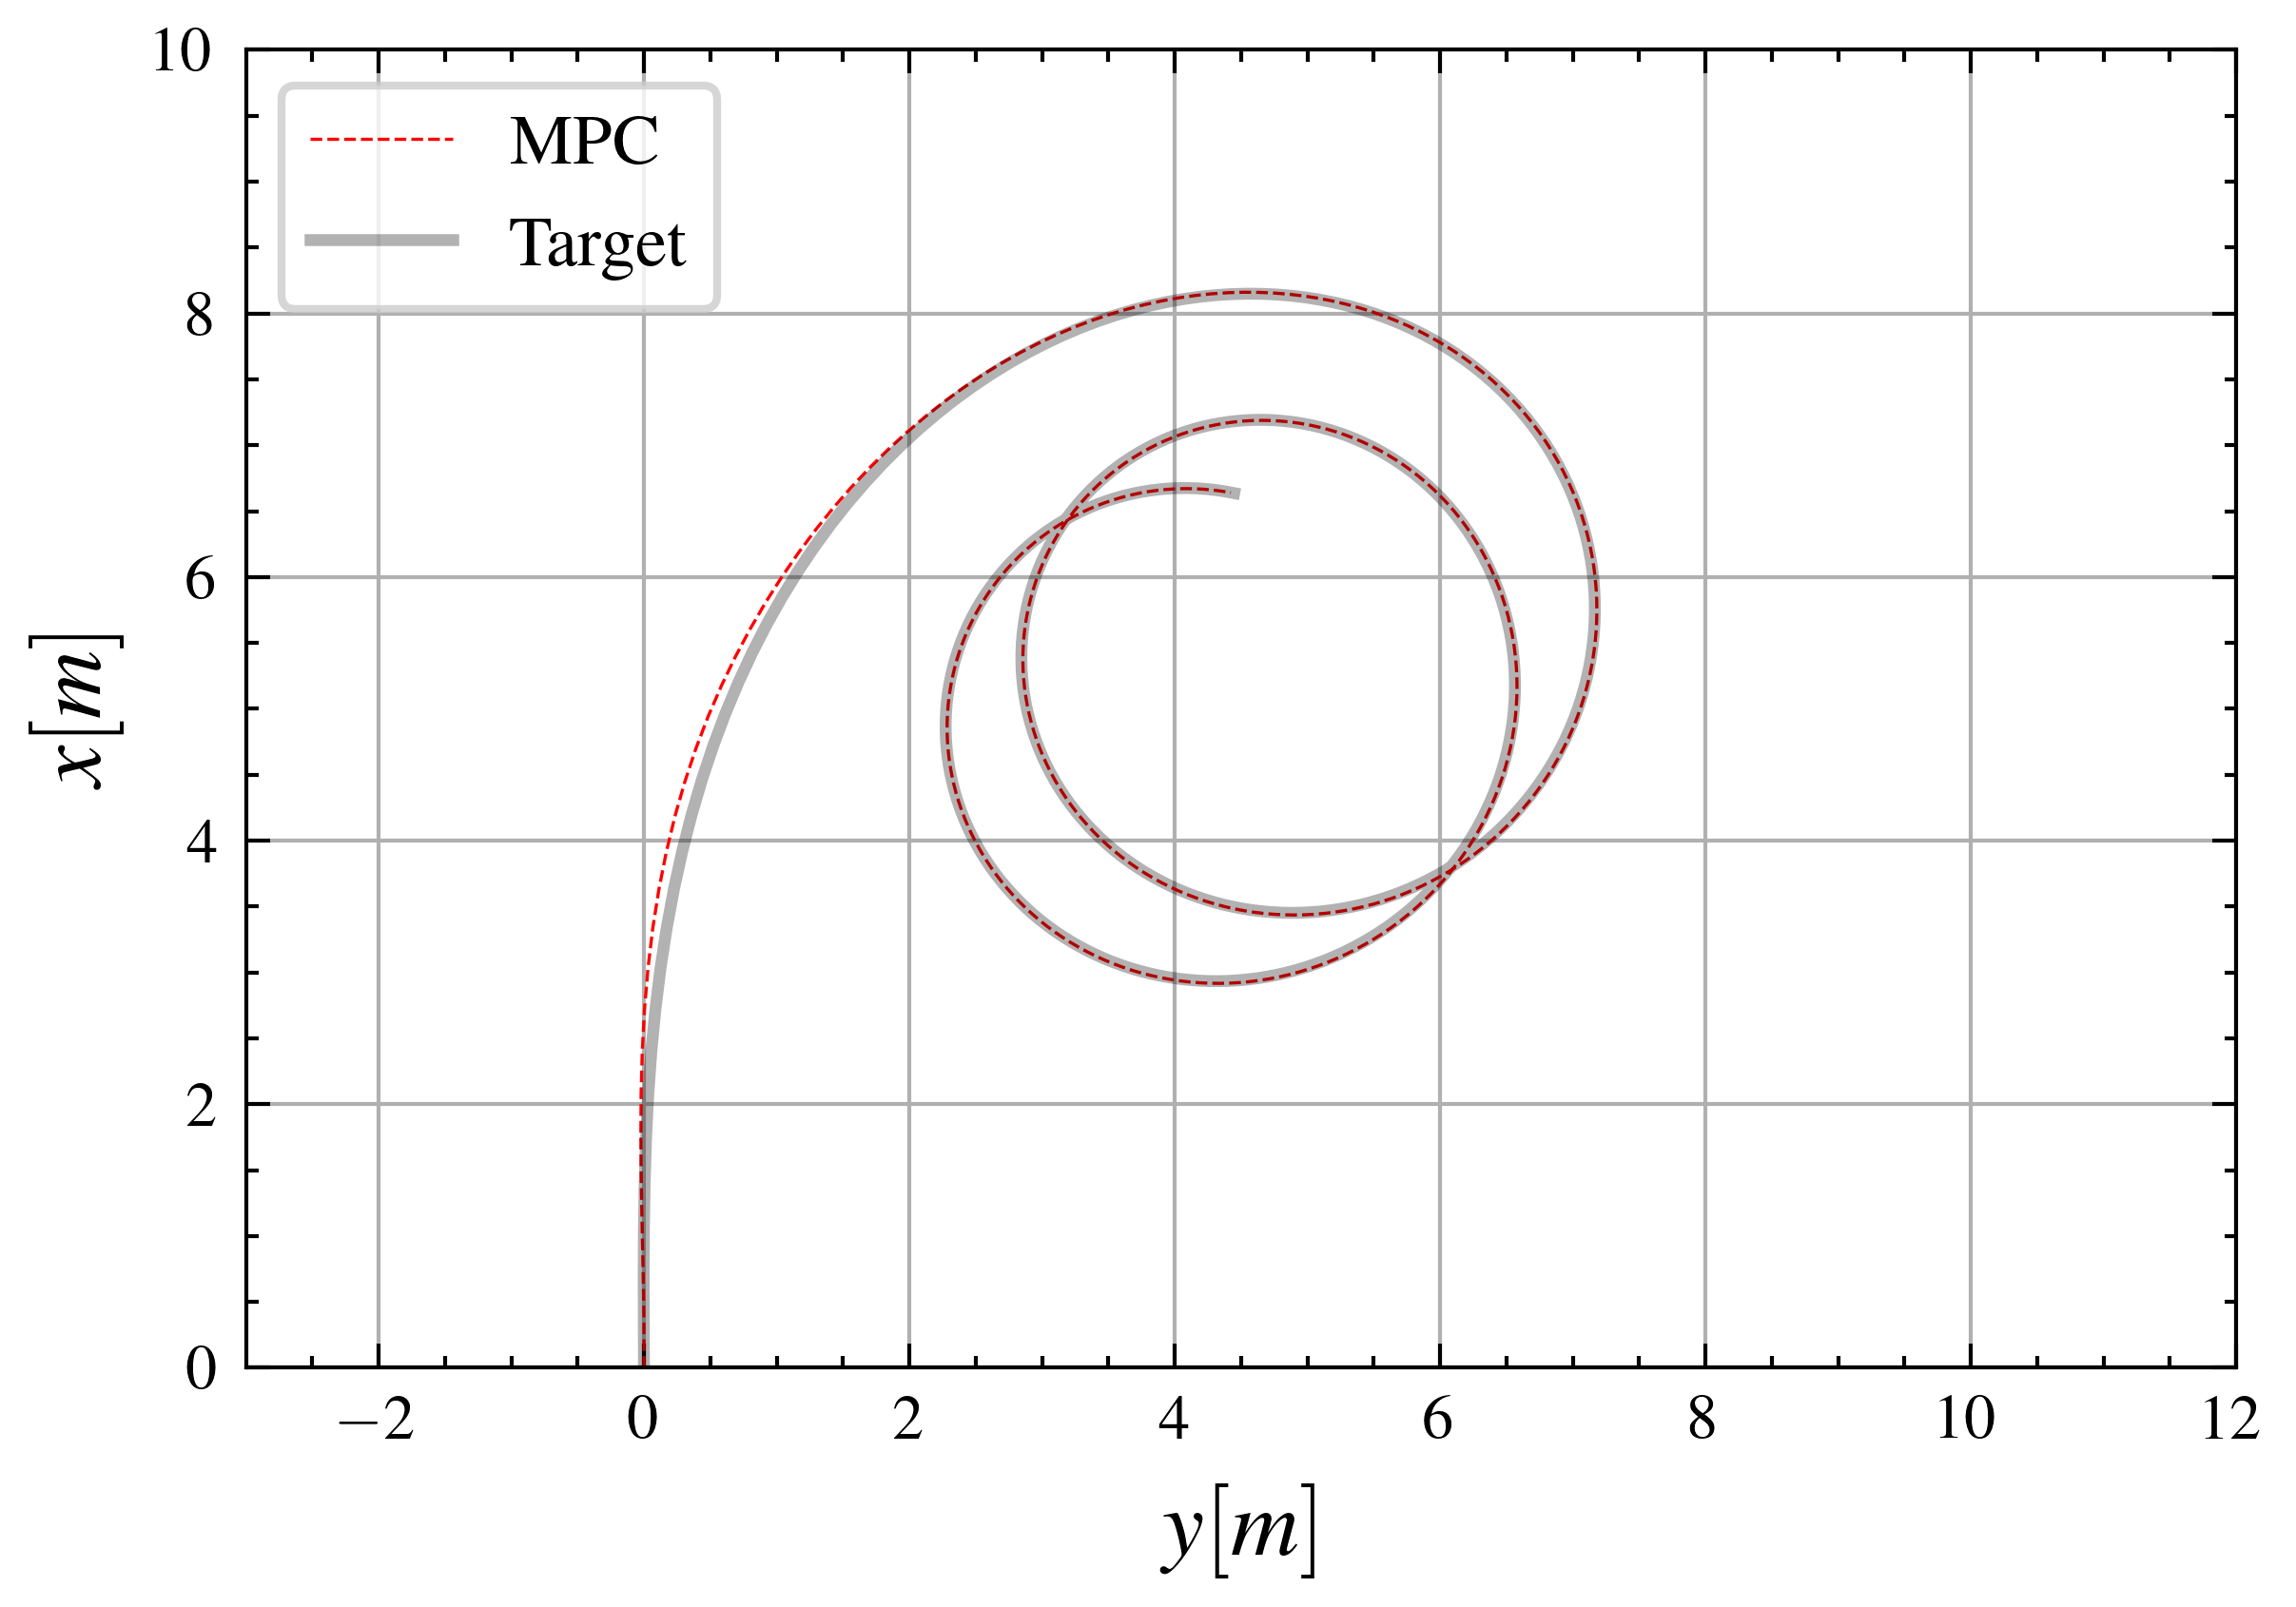

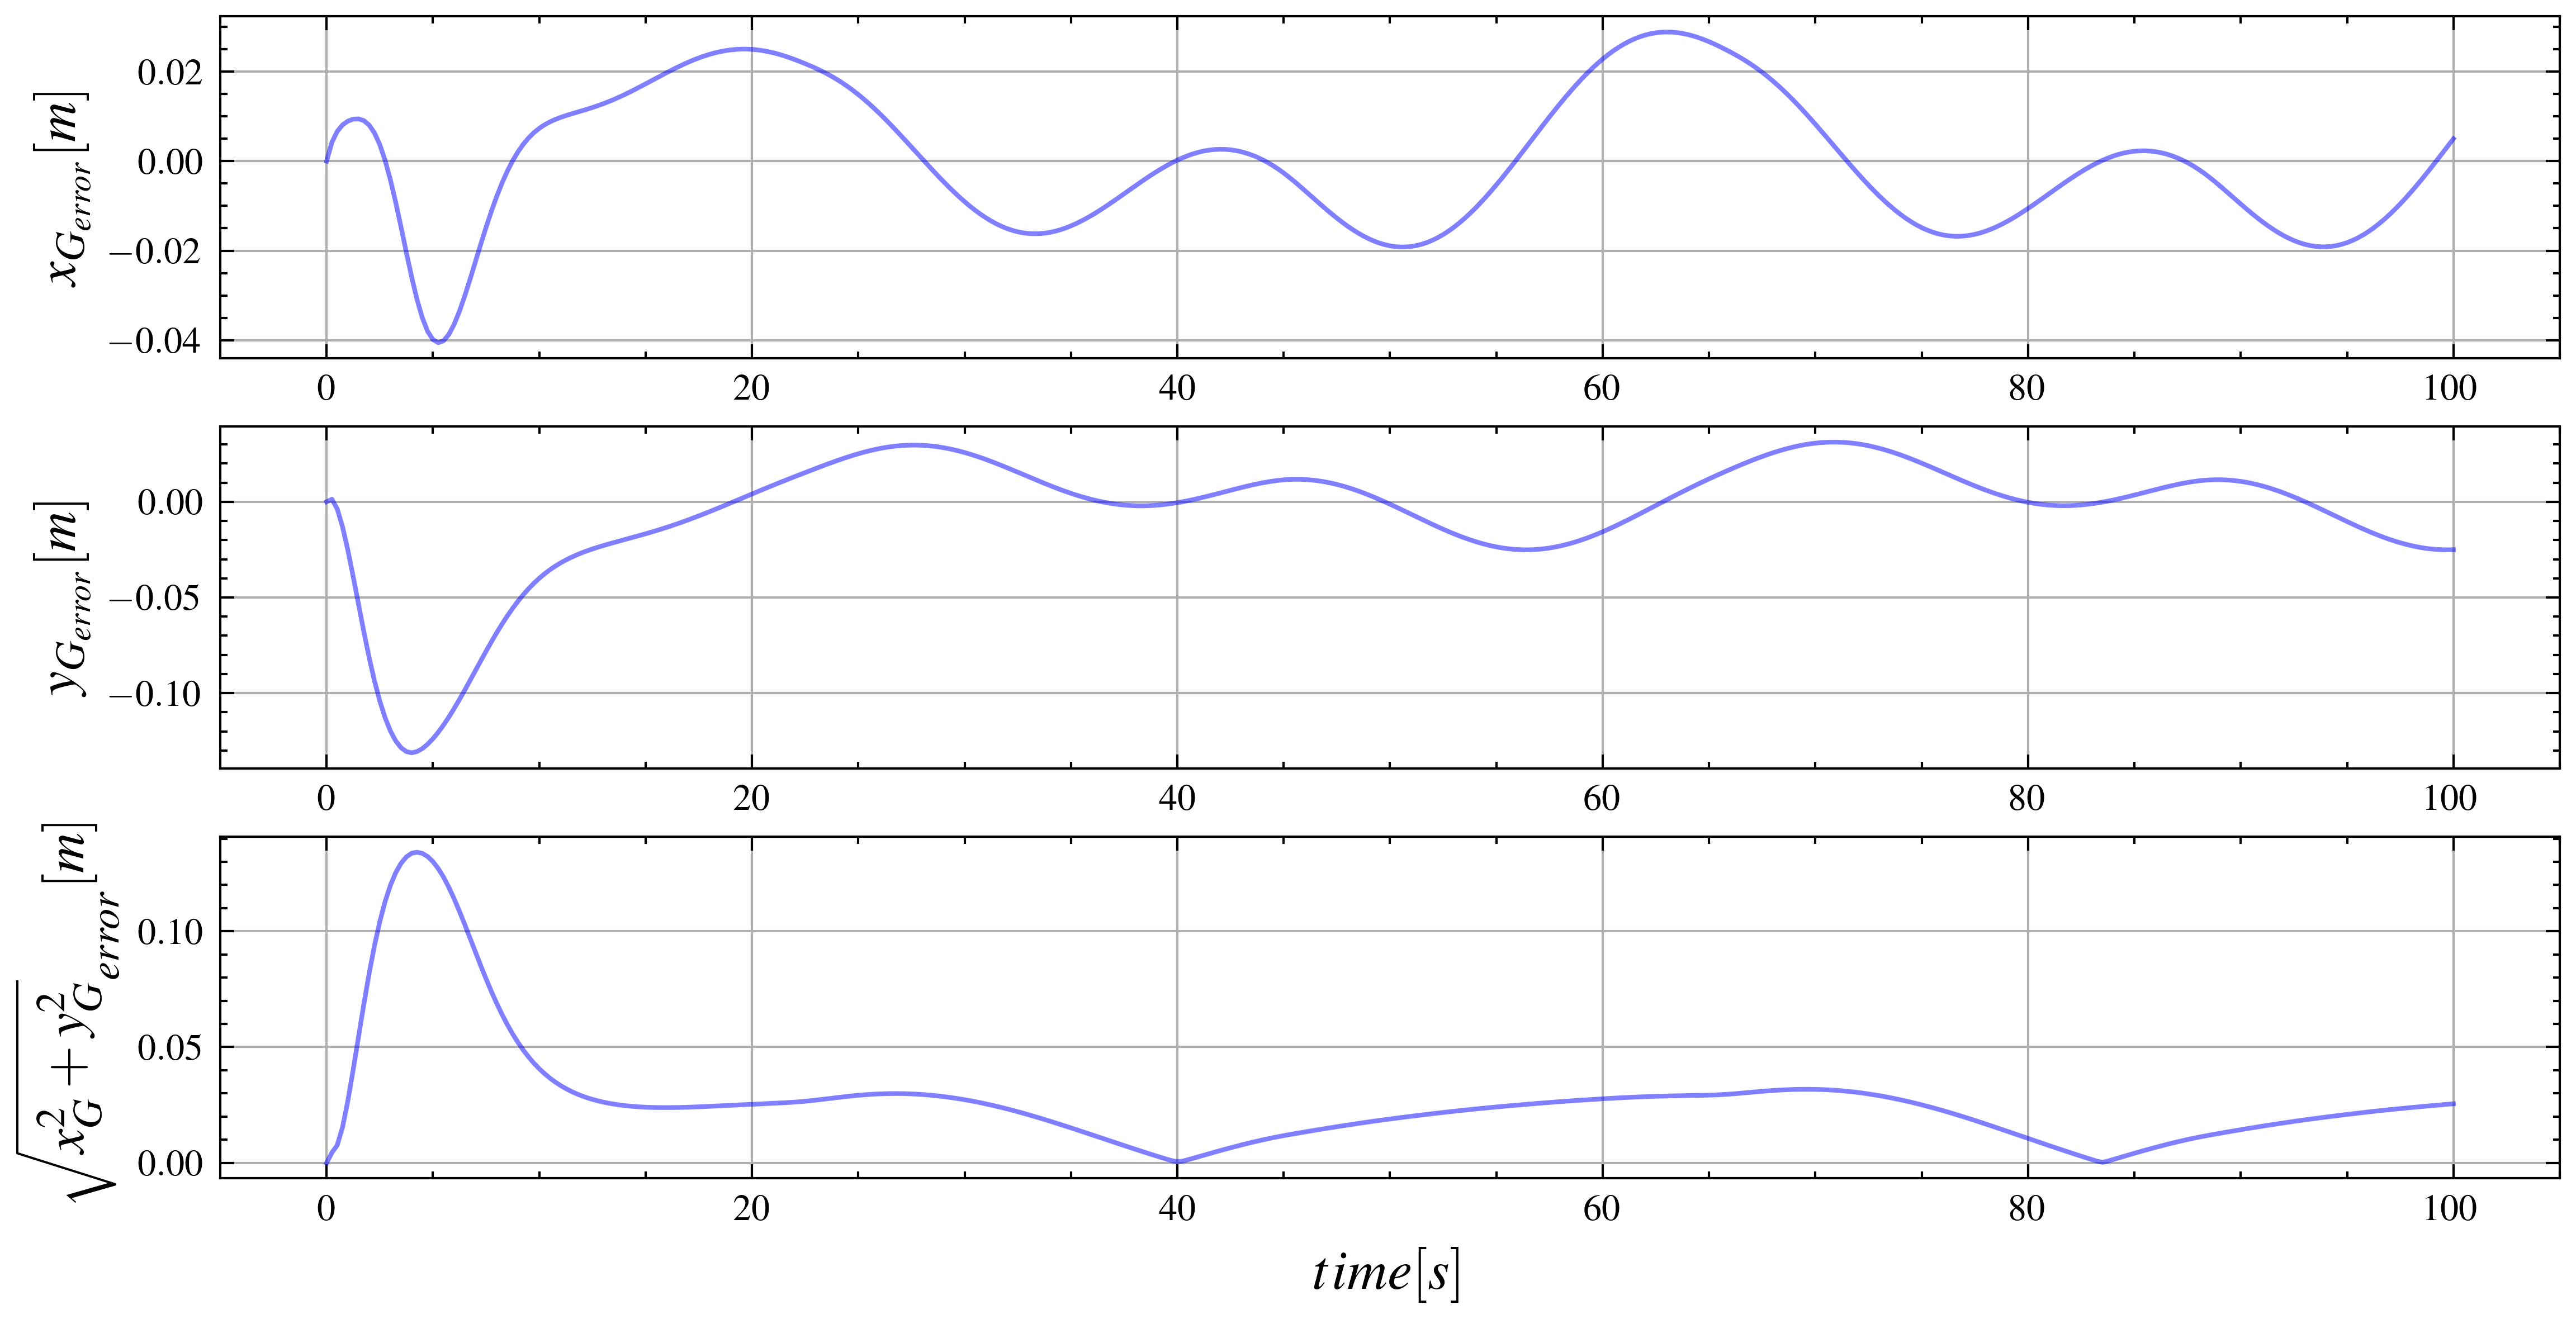

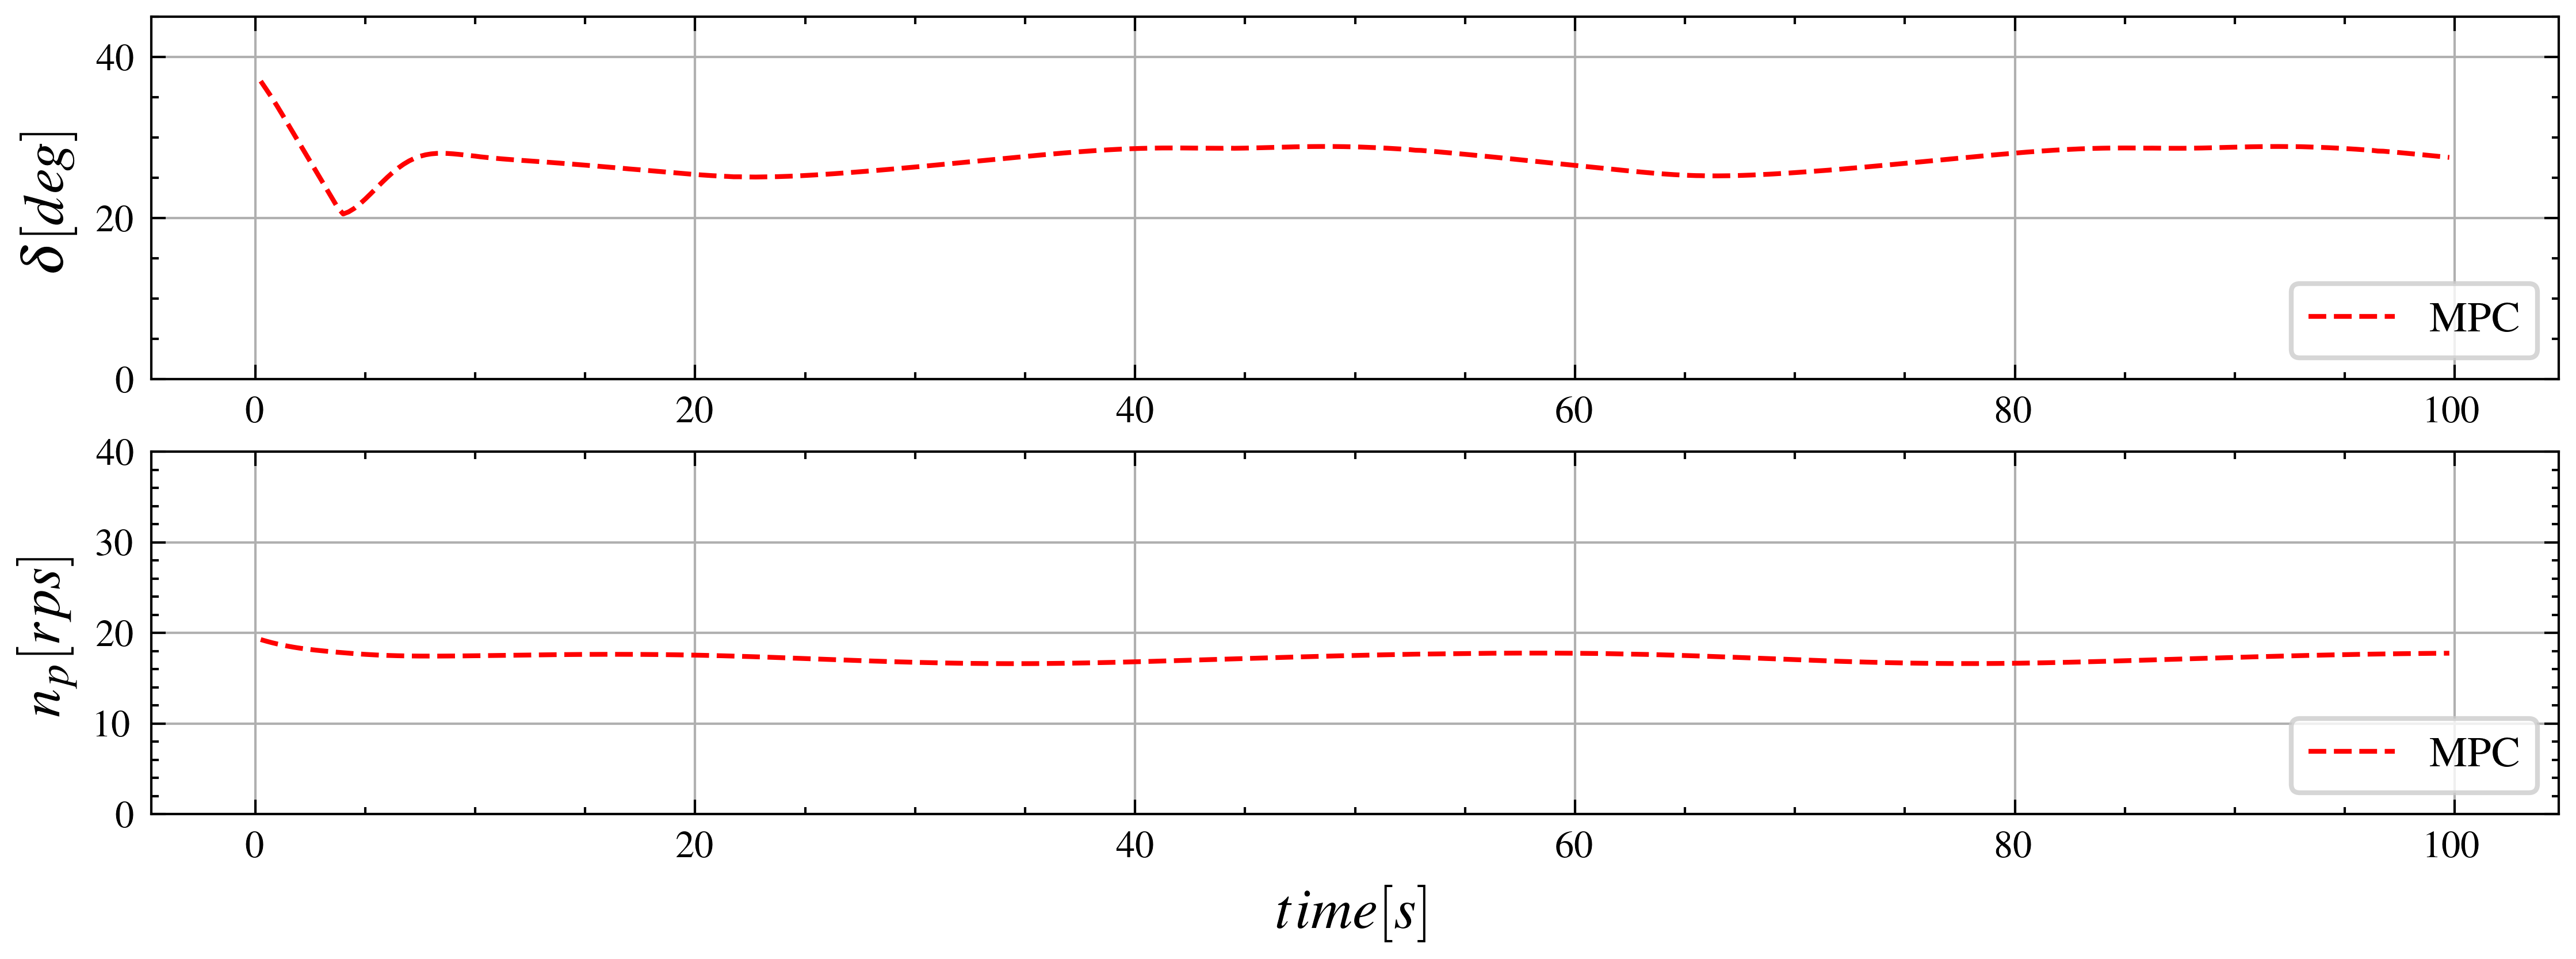

In [7]:
fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[1:sampling,"y"], data[1:sampling,"x"], "--", label="MPC", c="r", linewidth=0.4)
ax.plot(obs[1:sampling,"y_est"], obs[1:sampling,"x_est"], "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
ax.set_ylabel(L"x[m]", fontsize=12)
ax.set_xlabel(L"y[m]", fontsize=12)
ax.legend(frameon=true, loc="upper left", fontsize=9)
ax.set_ylim(0, 10)
ax.set_xlim(-3, 12)
#ax.set_ylim(-6, 44)
#ax.set_xlim(-24, 48)
ax.grid()
fig.show()

fig = plt.figure(figsize=(9, 4.5))
# x
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(data[!,"time"], data[!,"x"]-obs[1:sampling+1,"x_est"], "-",  color="b", alpha=0.5, linewidth=1)
ax1.set_ylabel(L"x_{G_{error}}[m]", fontsize=12)
ax1.grid()
# y
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(data[!,"time"], data[!,"y"]-obs[1:sampling+1,"y_est"], "-",  color="b", alpha=0.5, linewidth=1)
ax2.set_ylabel(L"y_{G_{error}}[m]", fontsize=12)
ax2.grid()
# x^2+y^2
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(data[!,"time"], sqrt.((data[!,"x"].-obs[1:sampling+1,"x_est"]).^2+(data[!,"y"].-obs[1:sampling+1,"y_est"]).^2), "-", color="b", alpha=0.5, linewidth=1)
ax3.set_ylabel(L"\sqrt{x_{G}^2+y_{G}^2}_{error}[m]", fontsize=12)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)
fig.show()

fig = plt.figure(figsize=(9, 3))
# δ
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data[2:sampling,"time"], data[2:sampling,"δ"]*180/3.14, "--", label="MPC", color="red", alpha=1.0, linewidth=1)
#ax1.plot(time_list, δ_rad_list, "-", label="Target", color="k", alpha=0.4, linewidth=2)
ax1.set_ylabel(L"\delta[deg]", fontsize=12)
ax1.set_ylim(0, 45)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)
# n_p
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data[2:sampling,"time"], data[2:sampling,"n_p"], "--", label="MPC", color="red", alpha=1.0, linewidth=1)
#ax2.plot(time_list, n_p_list, "-", label="Target", color="k", alpha=0.4, linewidth=2)
ax2.set_ylabel(L"n_{p}[rps]", fontsize=12)
ax2.set_ylim(0, 40)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)
ax2.set_xlabel(L"time[s]", fontsize=12)
fig.show()